
# Project: The Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In this project we'll be analysis the TMDB movie database, initially we'll clean the database, then perform exploratory analysis. We'll calculate characteristics of popular movies, analyse the dataset for most profitable directors and finding the most profitable movies and their popularity during 2005 - 2015.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section the csv file is loaded into a pandas dataframe. <br>
First two rows are printed 
Shape of the data set is printed
Data types of all columns are printed
Data is analysed for null values

In [2]:
# Loaded data
# printed first two rows
# checked data types of all columns, checked shape of dataframe
movie_df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
print(movie_df.head(2))
print(movie_df.shape)
print(movie_df.dtypes)


       id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.   

       ...                                                overview runtime  \
0      ...       Twenty-two years after the events of Jurassic ...     124   
1      ...       An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thrill

In [3]:
#check for null data
print(movie_df.isnull().sum())

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64




### Data Cleaning 
Changed the release date column so that it contains pandas datetime objects.<br>
Dropped all rows containing null values.<br>
Sort data set by release date.
Useless columns are dropped


In [4]:
# The data type of movie_df['release_date'] is str
# Here it is converted to a pandas datetime object
# check datatype after conversion 
print(type(movie_df['release_date'][0]))
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])
print(type(movie_df['release_date'][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
# drop all rows containing nulls
# check if all null rows are dropped successfully
movie_df.dropna(inplace = True)
movie_df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [6]:
# sort the data set by release date
# verify if the changes have been made successfully
movie_df.sort_values(by = ['release_date'],inplace = True)
movie_df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10657,5722,tt0065466,0.374514,0,0,Beyond the Valley of the Dolls,Dolly Read|Cynthia Myers|Marcia McBroom|John L...,http://www.beyondthevalleyofthedolls.com/home....,Russ Meyer,This Is Not A Sequel. There Has Never Been Any...,...,A hip and happenin' all girl rock group head t...,109,Comedy|Drama|Thriller,Twentieth Century Fox Film Corporation,1970-07-17,19,6.2,1970,0.000000e+00,0.000000e+00
9932,636,tt0066434,0.627942,777000,2437000,THX 1138,Robert Duvall|Donald Pleasence|Don Pedro Colle...,http://www.thx1138movie.com/,George Lucas,Visit the future where love is the ultimate cr...,...,People in the future live in a totalitarian so...,86,Drama|Mystery|Science Fiction|Thriller,American Zoetrope|Warner Bros.,1971-03-11,125,6.1,1971,4.184296e+06,1.312372e+07
9951,25188,tt0067328,0.369308,1300000,29133000,The Last Picture Show,Timothy Bottoms|Jeff Bridges|Cybill Shepherd|B...,http://www.filmsite.org/lastp.html,Peter Bogdanovich,"Anarene, Texas, 1951. Nothing much has changed...",...,The coming of age of a youth named Sonny in a ...,118,Drama,Columbia Pictures Corporation|BBS Productions,1971-10-03,42,7.0,1971,7.000753e+06,1.568869e+08
9925,681,tt0066995,1.755117,7200000,116000000,Diamonds Are Forever,Sean Connery|Jill St. John|Charles Gray|Lana W...,http://www.mgm.com/view/movie/529/Diamonds-Are...,Guy Hamilton,The man who made 007 a household number,...,Diamonds are stolen only to be sold again in t...,120,Adventure|Action|Thriller|Science Fiction,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,1971-12-13,331,6.2,1971,3.877340e+07,6.246826e+08
9927,984,tt0066999,0.885391,4000000,35976000,Dirty Harry,Clint Eastwood|Harry Guardino|Reni Santoni|Joh...,http://www.warnerbros.com/dirty-harry/,Don Siegel,Detective Harry Callahan. He doesn't break mur...,...,"When a madman dubbed the ""Scorpio Killer"" terr...",102,Action|Crime|Thriller,Warner Bros.|Malpaso Company,1971-12-22,300,7.2,1971,2.154078e+07,1.937378e+08
7269,238,tt0068646,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,http://www.thegodfather.com/,Francis Ford Coppola,An offer you can't refuse.,...,"Spanning the years 1945 to 1955, a chronicle o...",175,Drama|Crime,Paramount Pictures|Alfran Productions,1972-03-15,3970,8.3,1972,3.128737e+07,1.277914e+09
10595,253,tt0070328,1.549139,7000000,161777836,Live and Let Die,Roger Moore|Yaphet Kotto|Jane Seymour|Clifton ...,http://www.mgm.com/view/movie/1130/Live-and-Le...,Guy Hamilton,Roger Moore is James Bond.,...,James Bond must investigate a mysterious murde...,121,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),1973-07-05,293,6.1,1973,3.437812e+07,7.945168e+08
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,12-year-old Regan MacNeil begins to adapt an e...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1973-12-26,1113,7.2,1973,3.928928e+07,2.167325e+09
9763,1410,tt0069945,0.837644,60000,0,Dark Star,Brian Narelle|Cal Kuniholm|Dre Pahich|Adam Bec...,http://www.theofficialjohncarpenter.com/dark-s...,John Carpenter,What Do You Say To A Talking Bomb? All Systems...,...,"A low-budget, sci-fi satire that focuses on a ...",83,Comedy|Science Fiction,University of Southern California|Jack H. Harr...,1974-04-01,43,5.4,1974,2.653370e+05,0.000000e+00
9760,682,tt0071807,1.619555,7000000,97572000,The Man with the Golden Gun,Roger Moore|Christopher Lee|Britt Ekland|Maud ...,http://www.mgm.com/view/movie/1213/The-Man-wit...,Guy Hamilton,The man with the golden gun is ready to assass...,...,A golden bullet has 007 engraved on it as it s...,125,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|

In [87]:
# drop id,imdb_id columns
# verify if the columns are dropped
print(movie_df.columns)
#movie_df.drop(['id', 'imdb_id'],axis = 1, inplace = True)
print(movie_df.columns)
print(movie_df.shape)

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage',
       'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')
Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage',
       'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')
(1992, 19)


<a id='eda'></a>
## Exploratory Data Analysis


### Who are the top 5 profitable directors?

In [8]:
# create a new dataframe consisting of directors and sum of revenues and budgets of all the films they've worked in
# add a new column 'profit' , it is the difference of revenue and budget
# sort the dataframe in decreasing order of revenue
# clip the data set so that it contains only top 5 rows
dir_rev = movie_df.groupby('director').sum()[['budget','revenue']]
dir_rev['profit'] = dir_rev['revenue'] - dir_rev['budget']
dir_rev.sort_values(by = ['profit'], ascending = False, inplace = True)
dir_rev = dir_rev.head()



                       profit
director                     
Peter Jackson      4857642820
Steven Spielberg   4620106337
James Cameron      4265552106
David Yates        3379295625
Christopher Nolan  3094833672


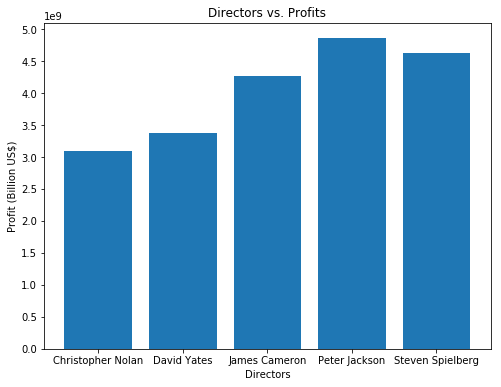

In [9]:
# plot a bar graph using dir_rev data set
# X - axis --  director name
# Y - axis -- Profit



locs = dir_rev.index.tolist()
heights = dir_rev['profit'].values.tolist()

print(dir_rev.loc[:,['profit']])
plt.figure(figsize = (8,6));
plt.bar(locs, heights);
plt.xlabel("Directors");
plt.ylabel("Profit (Billion US$)");
plt.yticks(np.arange(0,5.5e9,0.5e9));
plt.title("Directors vs. Profits");



###  How popular were the movies that earned highest profits during 2005 - 2015 [top 5 movies]?

In [10]:
# select a subset of the dataset containing movies only with release year in 2005 - 2015
# sort the data set in decreasing order of profits
top_mov = movie_df.query('release_year >= 2005 and release_year <= 2015')[['original_title','popularity','budget','revenue']]
top_mov['profit'] = top_mov['revenue'] - top_mov['budget']
top_mov.sort_values(by = ['profit'],ascending = False, inplace = True)
top_mov = top_mov.head()
df = top_mov.groupby('original_title')['budget','revenue','profit','popularity'].sum()


                                  profit  popularity
original_title                                      
Avatar                        2544505847    9.432768
Furious 7                     1316249360    9.335014
Jurassic World                1363528810   32.985763
Star Wars: The Force Awakens  1868178225   11.173104
The Avengers                  1299557910    7.637767


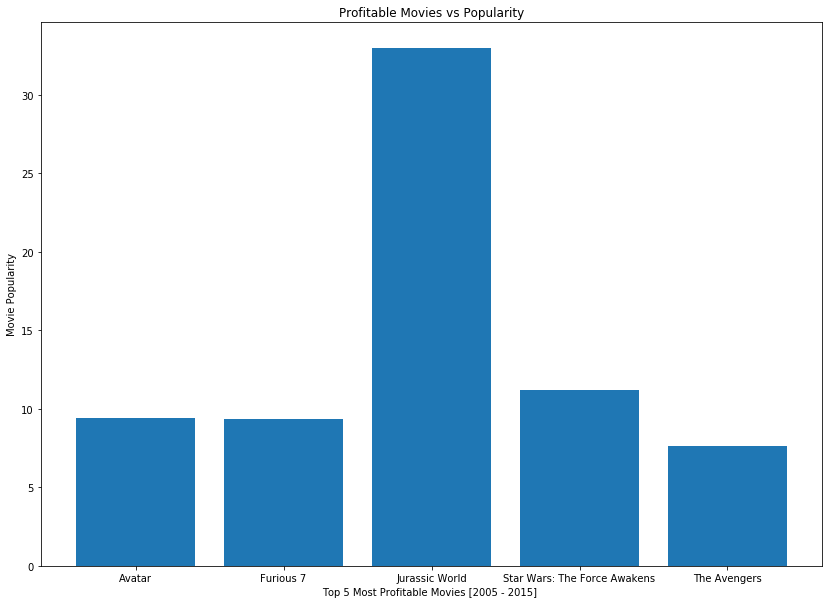

In [11]:
# plot a bar graph original_title vs popularity from the top_mov dataframe
# X - axis -- movie-title
# Y - axis -- popularity
# display descriptive statistics regarding the plot

locs = df.index.tolist()
heights = df['popularity'].tolist()
plt.figure(figsize = (14,10));
plt.bar(locs, heights);
print(df[['profit', 'popularity']])
plt.xlabel("Top 5 Most Profitable Movies [2005 - 2015] ");
plt.ylabel("Movie Popularity");
plt.title("Profitable Movies vs Popularity");

### What are the properties associated most popular comedy movies [top 5]?
Display genres, popularity, profits of top 5 popular comedy movies?

In [16]:
# create a subset of the original dataframe so that it stores top 5 most popular comedy  movies in decreasing order of popularity
com_mov = movie_df[movie_df['genres'].str.contains('Comedy')].sort_values(by =['popularity'], ascending = False)[:5]
pop_com = com_mov.groupby('original_title')['genres','popularity','budget','revenue'].sum()
pop_com['profit'] = pop_com['revenue'] - pop_com['budget']
pop_com


,popularity,budget,revenue,profit
original_title,,,,
Back to the Future,6.095293,19000000,381109762,362109762
Big Hero 6,8.691294,165000000,652105443,487105443
Inside Out,6.326804,175000000,853708609,678708609
Minions,7.404165,74000000,1156730962,1082730962
Pixels,5.984995,88000000,243637091,155637091


original_title
Back to the Future    6.095293
Big Hero 6            8.691294
Inside Out            6.326804
Minions               7.404165
Pixels                5.984995
Name: popularity, dtype: float64


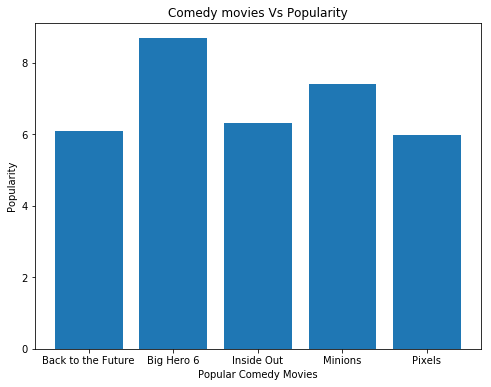

In [89]:
#define a function that plots popular comedy movies vs characteristics
def pop_com_plotter(column_name):
    print(pop_com[column_name])
    loc = pop_com.index.tolist()
    heights = pop_com[column_name].tolist()
    plt.figure(figsize = (8,6))
    plt.bar(loc,heights)
    plt.xlabel("Popular Comedy Movies")
    plt.ylabel(column_name.title())
    if column_name == 'profit':
        plt.ylabel('Profit(Billion US Dollars)');
    plt.title("Comedy movies Vs " + column_name.title());

    
pop_com_plotter('popularity') #popularity


original_title
Back to the Future     362109762
Big Hero 6             487105443
Inside Out             678708609
Minions               1082730962
Pixels                 155637091
Name: profit, dtype: int64


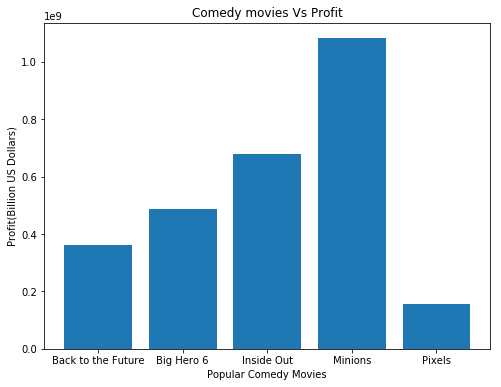

In [90]:
pop_com_plotter('profit')# plot movies vs profit

In [88]:
pop_com.describe()

,popularity,budget,revenue,profit
count,5.000000,5.000000e+00,5.000000e+00,5.000000e+00
mean,6.900510,1.042000e+08,6.574584e+08,5.532584e+08
std,1.148505,6.546526e+07,3.658663e+08,3.518152e+08
min,5.984995,1.900000e+07,2.436371e+08,1.556371e+08
25%,6.095293,7.400000e+07,3.811098e+08,3.621098e+08
50%,6.326804,8.800000e+07,6.521054e+08,4.871054e+08
75%,7.404165,1.650000e+08,8.537086e+08,6.787086e+08
max,8.691294,1.750000e+08,1.156731e+09,1.082731e+09


### Provide statistical analysis of revenue associated with top 5 profitable directors<br>

Create a data set of movies directed by top 5 directors
Provide descriptive statistics of the revenue associated with them
Plot boxplot displaying the revenues earned by their movies


                           mean          min           25%          50%  \
director                                                                  
Christopher Nolan  5.791191e+08   39723096.0  2.419475e+08  621752480.0   
David Yates        1.038574e+09  933959197.0  9.371494e+08  946259303.0   
James Cameron      1.180488e+09   17040871.0  6.303862e+07  961702694.0   
Peter Jackson      7.429554e+08    3049135.0  6.769077e+08  940703594.0   
Steven Spielberg   4.779642e+08  177584879.0  3.271329e+08  389925971.0   

                            75%           max  count  
director                                              
Christopher Nolan  9.137109e+08  1.081041e+09    7.0  
David Yates        1.047684e+09  1.327818e+09    4.0  
James Cameron      2.079152e+09  2.781506e+09    4.0  
Peter Jackson      9.730509e+08  1.118889e+09    8.0  
Steven Spielberg   6.304039e+08  9.201000e+08   11.0  


Text(0,0.5,'Revenue (Billion US dollars)')

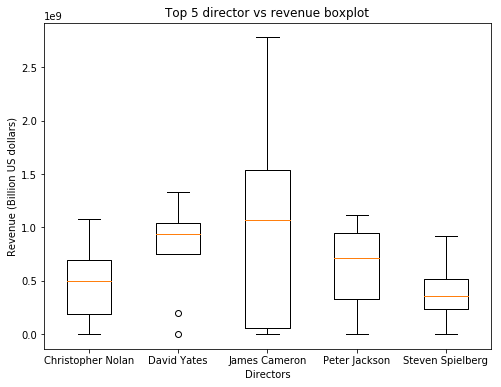

In [94]:
df_1 = movie_df[movie_df['director'].isin(dir_rev.index.tolist())]
df_2 = df_1.groupby('director')['revenue'].describe()

print(df_2[['mean','min','25%','50%','75%','max','count']])
plt.figure(figsize = (8,6))
plt.boxplot(df_2)
plt.xticks([1,2,3,4,5],['Christopher Nolan', 'David Yates', 'James Cameron', 'Peter Jackson',
       'Steven Spielberg']);
plt.title('Top 5 director vs revenue boxplot')
plt.xlabel('Directors')
plt.ylabel('Revenue (Billion US dollars)')

<a id='conclusion'></a>
## Conclusion


The data set contained 10866 rows and 21 columns after removing useless columns the total number of columns were 19,
the data set includes movie names, their popularity, budget, revenue, director, cast, genres and other details.
Below are some questions that can be answered after a thorough analysis of the data  along with their answers. The provided data was quite adequate in context of these questions. 

### 1 Who are the top 5 profitable directors? 
The profits earned by movies was calculated by subtracting budget from revenue. After arranging the movies in decreasing order of profits and then selecting the first 5 rows, the top 5 most profitable directors were:
<ol>
&nbsp;&nbsp;&nbsp;&nbsp;<li> Peter Jackson  with total profit of 4857642820 US dollars </li>
&nbsp;&nbsp;&nbsp;&nbsp;<li> Steven Spielberg  with total profit of 4620106337 US dollars </li>
&nbsp;&nbsp;&nbsp;&nbsp;<li> James Cameron with total profit of 4265552106 US dollars </li>
&nbsp;&nbsp;&nbsp;&nbsp;<li> David Yates with total profit of 3379295625 US dollars </li>
&nbsp;&nbsp;&nbsp;&nbsp;<li> Christopher Nolan with total profit of 3094833672 US dollars </li>
</ol>

### 2 How popular were the movies that earned highest profits during 2005 - 2015 [top 5 movies]? 
After creating a subset of movies that were released between 2005 and 2015 a data set was created using highest profitable movies and selecting the first 5 rows a bar graph was plotted with movies on 
X - axis and their popularity on Y axis, from the graph the following data was gathered. <br>
Following are the movies that earned the most profits in decreasing order of their popularity:
<ol> 
    <li> Jurassic World </li>                
    <li> Star Wars: The Force Awakens </li>  
    <li> Avatar </li>                       
    <li> Furious 7 </li>                    
    <li> The Avengers </li>
</ol>

### 3 What are the properties associated most popular comedy movies [top 5]?
The data set includes movies of comedy genre and high popularity, after performing statistical analysis 
following conclusions were made. Following are the most popular comedy movies:
<ol>
    <li> Big Hero 6  </li>   
    <li> Minions              </li> 
    <li> Inside Out            </li>
    <li> Back to the Future    </li>
<li> Pixels                </li>
</ol>

#### Stats
<ul>
    <li> The most popular movie among them is Big Hero 6 </li>
    <li> The most profitable movie among them is Minions </li>
    <li> The mean revenue of most popular comedy movies is around 657 Million Dollars </li>
    <li> The mean budget of most popular comedy movies is around 104 Million Dollars</li>
</ul>    

### 4 Provide statistical analysis of revenue associated with top 5 profitable directors
These directors are the most profitable directors that were isolated in question 1
Exploratory data analysis includes a box plot that depicts the  revenue earned by the movies of these directors
The following list contains the names of directors in decresing order of mean revenue earned by their movies:
<ol>
    <li> James Cameron </li>
    <li> David Yates </li>
    <li> Peter Jackson </li>
    <li> Christopher Nolan </li>
    <li> Steven Spielberg </li>
 </ol>

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])